### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. You **ONLY** change the parts of the code we asked you to, nowhere else (change only the coding parts saying `# YOUR CODE HERE`, nothing else);
6. Don't add any new cells to this notebook;
7. Fill in your group number and the full names of the members in the cell below;
8. Make sure that you are not running an old version of IPython (we provide you with a cell that checks this, make sure you can run it without errors).

Failing to meet any of these requirements might lead to a request for resubmission.

We advise you the following steps before submission for ensuring that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All ). This might require a bit of time, so plan ahead for this. Finally press the "Save and Checkpoint" button before handing in, to make sure that all your changes are saved to this .ipynb file.

---

Group number and member names:

In [1]:
GROUP = ""
NAME1 = "Patrik Persson"
NAME2 = "Axel Berg"

Make sure you can run the following cell without errors.

In [2]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

# HA1 - Cats and dogs

<img src="http://lghttp.32478.nexcesscdn.net/80E972/organiclifestylemagazine/wp-content/uploads/2015/10/Cats-and-Dogs.jpg" alt="Cats and dogs" style="width: 5000px;"/>

For this home assignment, we'll use the Kaggle dataset for the [Dogs vs. Cats competition](https://www.kaggle.com/c/dogs-vs-cats). It is comprised of 25k colored images of dogs and cats. Our goal with this dataset will be to create a classifier that can tell us if the input image is of a cat or a dog.

Requirements:
- Whenever we ask you to plot anything, be sure to add a title and label the axes. If you're plotting more than one curve in the same plot, also add a legend.
- When we ask you to train an architecture, train it for a reasonable number of epochs. "Reasonable" here means you should be fairly confident that training for a higher number of epochs wouldn't impact your conclusions regarding the model's performance.

Tips:

- Keras and GPU. Having a general set of instructions for all GPU platforms is tricky. The environment we have provided is configured for CPU. Usually it is enough to
```pip install tensorflow-gpu```
you can then list available GPU's by running:
```
from keras import backend
backend.tensorflow_backend._get_available_gpus()
```
- Before starting, take a look at the images we'll be using. This is a hard task, don't get discouraged if your first models perform poorly (several participants in the original competition didn't achieve an accuracy higher than 60%).

---
## 0. Imports

In the following cell, add all the imports you'll use in this assignment.

In [48]:
# YOUR CODE HERE

# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D, Dropout, regularizers, BatchNormalization
from keras import backend

backend.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

---
## 1. Loading the data and preprocessing

The first step is to head to the [Kaggle website for the cats and dogs competition](https://www.kaggle.com/c/dogs-vs-cats) and download the data from there. You should download both the test and train folders together in one zip file (by clicking the download all button). The split ratio between training and validation has not been made, you'll need to do it yourself. The `test.zip` file contains unlabeled data, so that participants in the contest are not able to train on this set.

For this assignment you should use [data generators](https://keras.io/preprocessing/image/) to load the images to your CPU/GPU memory. Because of this, your folder structure for the data should conform to the folder structure expected by the data generators (i.e. the samples should be separated into one folder for each class). Furthermore, we ask you to first start with a smaller subset of the data (1/5 of the number of samples), in order to test different models faster.

This means that you should create a folder structure that resembles the following (obviously, the folder names are up to you):


         small_train             small_val                train                   val
              |                      |                      |                      |
              |                      |                      |                      |
        -------------          -------------          -------------          -------------
        |           |          |           |          |           |          |           |
        |           |          |           |          |           |          |           |
      Cats        Dogs       Cats        Dogs       Cats        Dogs       Cats        Dogs

The `small_train` and `small_val` folders have the training and validation samples for your smaller subset of the data, while the `train` and `val` folders contain all the samples you extracted from Kaggle's `train.zip`. We provide you a notebook that shows how to achieve this ("create_project_structure.ipynb"), starting from the original `dogs-vs-cats.zip` file that you download from Kaggle. If you do use that notebook, we encourage you to understand how each step is being done, so you can generalize this knowledge to new datasets you'll encounter.

We advise you to use 30% of the data as validation data in the smaller dataset. However, for the larger dataset, you should decide how to split between training and validation. Please specify your splits in the following cells.

For the larger subset, what was the training/validation split that you decided to use?

**% Samples in the training set:**

In [ ]:
# YOUR CODE HERE
# 3500 training samples in small dataset

**% Samples in the validation set:**

In [ ]:
# YOUR CODE HERE
# 1500 validation samples in small dataset

Fill in the dataset paths (to be used later by your data generators):

In [2]:
# YOUR CODE HERE
train_path = 'train'
small_train_path = 'small_train'
val_path = 'val'
small_val_path = 'small_val'

Once you have the expected folder structure, create two data generators for automatically generating batches from the images in your smaller subset of data. Don't use any [data augmentation](https://cartesianfaith.com/2016/10/06/what-you-need-to-know-about-data-augmentation-for-machine-learning/), but feel free to preprocess the data as you see fit. After instantiating them, run the `flow_from_directory` method with the desired arguments.

Hints:
- `flow_from_directory` infers the classes from the subdirectory names we have created.
  For a generator to be able to find test images, it needs a similar structure, e.g. 'test/test/an_image.jpg' 
- The specified `batch_size` should be chosen so that your don't run out of memory.
- When feeding the images to your CNN, you'll probably want all of them to have the same spatial size, even though the .jpeg files differ in this. If so, take a look at the argument `target_size` for the `flow_from_directory` method of data generators.
- Resizing the images to a smaller size while loading them can be beneficial.

In [49]:
# YOUR CODE HERE
train_datagen = keras.preprocessing.image.ImageDataGenerator()
val_datagen = keras.preprocessing.image.ImageDataGenerator()

input_size = (224,224)
train_generator = train_datagen.flow_from_directory(
        directory=small_train_path,
        target_size=input_size,
        batch_size=64,
        class_mode='categorical', 
        seed=0,
        shuffle=True)

validation_generator = val_datagen.flow_from_directory(
        small_val_path,
        target_size=input_size,
        batch_size=64,
        class_mode='categorical',
        shuffle=True)

Found 3500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


---
## 2. Training

Create your first CNN architecture for this task. Start with something as simple as possible, that you're almost sure can get an accuracy better than 50% (we'll improve upon it later).

Tip:
- If Tensorflow is your backend, your `input_shape` is always `(img_width, img_height, 3)` (i.e. channels **last**)

In [4]:
# YOUR CODE HERE
model = Sequential()
model.add(Conv2D(16, kernel_size=8, strides=2, activation='relu', input_shape=(input_size[0], input_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=4, strides=2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=2, strides=1, activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

opt = keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 61, 61, 16)        3088      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          32832     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
conv

Train your model using the `fit_generator` method and the two data generators you created earlier. Train for a reasonable amount of epochs, so as to get a good sense of how well this architecture performs.

Tips:
- Usually the bottleneck is when loading the images from the disk. To speed up training, make sure to take a look at the arguments `workers` and `use_multiprocessing` of `fit_generator`.
- You don't have to set the argument `steps_per_epoch` to the number of batches in an epoch. Instead, you can choose a lower number to obtain more frequent prints about the current loss and accuracy of your model (but then have in mind that you're not actually training for the number of epochs you specify in `epochs`).

In [5]:
# YOUR CODE HERE

np.random.seed(0)

steps_per_epoch = np.ceil(len(train_generator.filenames) / train_generator.batch_size);
history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    shuffle=True,
    use_multiprocessing=True,
    workers=10,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10


/home/patrik/anaconda3/envs/dml/lib/python3.6/site-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


55/55 [==============================] - 8s 140ms/step - loss: 1.3089 - acc: 0.5457 - val_loss: 1.0331 - val_acc: 0.5432
Epoch 2/10
55/55 [==============================] - 5s 100ms/step - loss: 0.7657 - acc: 0.6065 - val_loss: 0.7868 - val_acc: 0.5866
Epoch 3/10
55/55 [==============================] - 6s 110ms/step - loss: 0.6683 - acc: 0.6469 - val_loss: 0.7520 - val_acc: 0.5960
Epoch 4/10
55/55 [==============================] - 6s 114ms/step - loss: 0.5742 - acc: 0.7128 - val_loss: 0.8007 - val_acc: 0.6059
Epoch 5/10
55/55 [==============================] - 6s 105ms/step - loss: 0.5926 - acc: 0.7122 - val_loss: 0.7610 - val_acc: 0.6095
Epoch 6/10
55/55 [==============================] - 6s 111ms/step - loss: 0.5189 - acc: 0.7554 - val_loss: 0.8159 - val_acc: 0.6122
Epoch 7/10
55/55 [==============================] - 6s 107ms/step - loss: 0.5349 - acc: 0.7401 - val_loss: 0.7315 - val_acc: 0.6315
Epoch 8/10
55/55 [==============================] - 6s 107ms/step - loss: 0.5621 - acc:

Create one figure with two axes. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

Hint:
- The `fit_generator` method returns a `history` object.

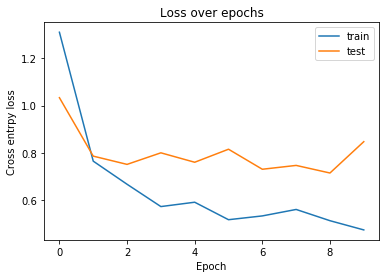

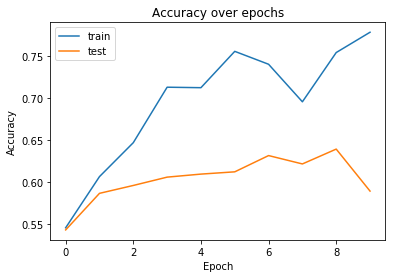

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over epochs')
plt.ylabel('Cross entrpy loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

Based on these, what would you suggest for improving your model? Why?

**Your answer:**


The above model achieves a training accuracy of 75 % and test accuracy of 60 %. From this, and by looking at the plots, we conclude that

* Training for only 10 epochs was probably too little, as the training loss was continuing to decrease when training was stopped
* There seems to be some degree of overfitting, since the validation accuracy does is significantly worse than the training accuracy. However, our strategy will be to first create a network that will overfit the dataset completely and then try to regularize the network to improve validation accuracy. 
* Therefore we will first try to train the same model for a longer period to see if it can overfit.

---
## 3. Improving your initial model

Improve your initial model according to you answer above. Write the new definition in the cell below and train it.

In [9]:
# YOUR CODE HERE

np.random.seed(0)

model2 = Sequential()
model2.add(Conv2D(16, kernel_size=8, strides=2, activation='relu', input_shape=(input_size[0], input_size[1], 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(32, kernel_size=4, strides=2, activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, kernel_size=4, strides=1, activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, kernel_size=2, strides=1, activation='relu'))
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dense(2, activation='softmax'))

opt2 = keras.optimizers.Adam(lr=1e-4)
model2.compile(optimizer=opt2, loss='categorical_crossentropy', metrics=['accuracy'])

steps_per_epoch = np.ceil(len(train_generator.filenames) / train_generator.batch_size);
history = model2.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    shuffle=True,
    use_multiprocessing=True,
    workers=12,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch)

Epoch 1/50
55/55 [==============================] - 7s 130ms/step - loss: 0.9881 - acc: 0.5935 - val_loss: 0.8650 - val_acc: 0.5534
Epoch 2/50
55/55 [==============================] - 6s 103ms/step - loss: 0.5657 - acc: 0.7537 - val_loss: 0.7857 - val_acc: 0.6134
Epoch 3/50
55/55 [==============================] - 6s 109ms/step - loss: 0.6610 - acc: 0.6693 - val_loss: 0.9686 - val_acc: 0.5506
Epoch 4/50
55/55 [==============================] - 6s 110ms/step - loss: 0.6300 - acc: 0.6989 - val_loss: 0.9356 - val_acc: 0.5236
Epoch 5/50
55/55 [==============================] - 6s 115ms/step - loss: 0.5498 - acc: 0.7520 - val_loss: 0.8891 - val_acc: 0.5783
Epoch 6/50
55/55 [==============================] - 6s 112ms/step - loss: 0.6013 - acc: 0.6835 - val_loss: 0.8073 - val_acc: 0.5569
Epoch 7/50
55/55 [==============================] - 6s 110ms/step - loss: 0.5336 - acc: 0.7327 - val_loss: 0.7944 - val_acc: 0.5861
Epoch 8/50
55/55 [==============================] - 6s 110ms/step - loss: 0.

How does the model perform, compared to the initial model? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

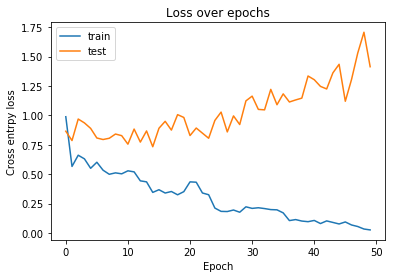

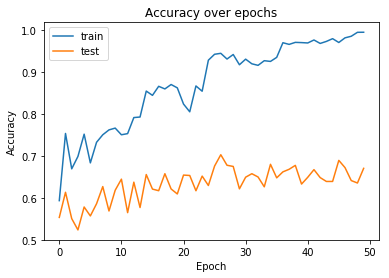

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over epochs')
plt.ylabel('Cross entrpy loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

Did your results improve? Explain why, or why not.

**Your answer:** 
* When increasing the number of epochs from 10 to 50, the training accuracy increased from 70 to 100 % and the validation accuracy from 60 to 65 %
* Now we have overfitted our network. In the next step we need to regularize our network in order to improve the performance on the test data.

---
## 4. Obtaining the *best* model

Continue to improve your model architecture by comparing the value of the metrics you're interested in both the training and validation set. Try different ideas, and consider comparing them using tensorboard. When you're happy with one architecture, copy it in the cell below and train it here. Save the optimization history (i.e. the `history` object returned by the `fit_generator`). You'll use this later to compare your best model with the one using transfer learning.

**Note**: When trying different ideas, you'll end up with several different models. However, when submitting your solutions to Canvas, the cell below must contain only the definition and training of *one* model. Remove all code related to the models that were not chosen.

In [33]:

np.random.seed(0)

regularization = 0.2;

model3 = Sequential()
model3.add(Conv2D(16, kernel_size=8, strides=2, activation='relu', input_shape=(input_size[0], input_size[1], 3),
           kernel_regularizer=regularizers.l2(regularization)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())
model3.add(Conv2D(32, kernel_size=4, strides=2, activation='relu', kernel_regularizer=regularizers.l2(regularization),padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())
model3.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', kernel_regularizer=regularizers.l2(regularization),padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())
model3.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', kernel_regularizer=regularizers.l2(regularization),padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())
model3.add(Conv2D(128, kernel_size=2, strides=1, activation='relu', kernel_regularizer=regularizers.l2(regularization),padding='same'))
model3.add(Flatten())
model3.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(regularization)))
model3.add(Dense(2, activation='softmax', kernel_regularizer=regularizers.l2(regularization)))

opt3 = keras.optimizers.Adam(lr=1e-5)
model3.compile(optimizer=opt3, loss='categorical_crossentropy', metrics=['accuracy'])

steps_per_epoch = np.ceil(len(train_generator.filenames) / train_generator.batch_size);
history = model3.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=500,
    shuffle=True,
    use_multiprocessing=True,
    workers=12,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch)

Epoch 1/500
55/55 [==============================] - 9s 162ms/step - loss: 66.9012 - acc: 0.5460 - val_loss: 66.3184 - val_acc: 0.4952
Epoch 2/500
55/55 [==============================] - 6s 104ms/step - loss: 65.7184 - acc: 0.5145 - val_loss: 65.1295 - val_acc: 0.4849
Epoch 3/500
55/55 [==============================] - 6s 106ms/step - loss: 64.5574 - acc: 0.5494 - val_loss: 63.9765 - val_acc: 0.5224
Epoch 4/500
55/55 [==============================] - 6s 107ms/step - loss: 63.4301 - acc: 0.5259 - val_loss: 62.8532 - val_acc: 0.5767
Epoch 5/500
55/55 [==============================] - 6s 106ms/step - loss: 62.2988 - acc: 0.5332 - val_loss: 61.7462 - val_acc: 0.5607
Epoch 6/500
55/55 [==============================] - 6s 108ms/step - loss: 61.1911 - acc: 0.5673 - val_loss: 60.6528 - val_acc: 0.5569
Epoch 7/500
55/55 [==============================] - 6s 106ms/step - loss: 60.1276 - acc: 0.5705 - val_loss: 59.5939 - val_acc: 0.5710
Epoch 8/500
55/55 [==============================] - 6s

55/55 [==============================] - 6s 112ms/step - loss: 22.9658 - acc: 0.7715 - val_loss: 22.8407 - val_acc: 0.6375
Epoch 62/500
55/55 [==============================] - 6s 115ms/step - loss: 22.5587 - acc: 0.7665 - val_loss: 22.4335 - val_acc: 0.6313
Epoch 63/500
55/55 [==============================] - 6s 108ms/step - loss: 22.1635 - acc: 0.7599 - val_loss: 22.0424 - val_acc: 0.6386
Epoch 64/500
55/55 [==============================] - 6s 114ms/step - loss: 21.7729 - acc: 0.7537 - val_loss: 21.6466 - val_acc: 0.6323
Epoch 65/500
55/55 [==============================] - 6s 112ms/step - loss: 21.4025 - acc: 0.7301 - val_loss: 21.2626 - val_acc: 0.6456
Epoch 66/500
55/55 [==============================] - 6s 113ms/step - loss: 21.0227 - acc: 0.7597 - val_loss: 20.8911 - val_acc: 0.6418
Epoch 67/500
55/55 [==============================] - 6s 116ms/step - loss: 20.6428 - acc: 0.7616 - val_loss: 20.5310 - val_acc: 0.6166
Epoch 68/500
55/55 [==============================] - 6s 110m

55/55 [==============================] - 6s 111ms/step - loss: 8.0640 - acc: 0.9912 - val_loss: 8.3882 - val_acc: 0.7133
Epoch 122/500
55/55 [==============================] - 6s 113ms/step - loss: 7.9341 - acc: 0.9955 - val_loss: 8.2595 - val_acc: 0.7114
Epoch 123/500
55/55 [==============================] - 6s 109ms/step - loss: 7.8090 - acc: 0.9898 - val_loss: 8.1207 - val_acc: 0.7181
Epoch 124/500
55/55 [==============================] - 6s 110ms/step - loss: 7.6802 - acc: 0.9940 - val_loss: 8.0119 - val_acc: 0.7075
Epoch 125/500
55/55 [==============================] - 6s 109ms/step - loss: 7.5526 - acc: 0.9946 - val_loss: 7.9057 - val_acc: 0.7006
Epoch 126/500
55/55 [==============================] - 6s 110ms/step - loss: 7.4303 - acc: 0.9935 - val_loss: 7.7866 - val_acc: 0.7107
Epoch 127/500
55/55 [==============================] - 6s 113ms/step - loss: 7.3127 - acc: 0.9932 - val_loss: 7.6868 - val_acc: 0.6994
Epoch 128/500
55/55 [==============================] - 6s 110ms/step 

Epoch 182/500
55/55 [==============================] - 6s 110ms/step - loss: 3.0000 - acc: 1.0000 - val_loss: 3.4207 - val_acc: 0.7100
Epoch 183/500
55/55 [==============================] - 6s 108ms/step - loss: 2.9508 - acc: 1.0000 - val_loss: 3.3389 - val_acc: 0.7268
Epoch 184/500
55/55 [==============================] - 6s 112ms/step - loss: 2.9037 - acc: 0.9994 - val_loss: 3.3432 - val_acc: 0.6991
Epoch 185/500
55/55 [==============================] - 6s 112ms/step - loss: 2.8574 - acc: 1.0000 - val_loss: 3.2695 - val_acc: 0.7090
Epoch 186/500
55/55 [==============================] - 6s 108ms/step - loss: 2.8111 - acc: 1.0000 - val_loss: 3.2079 - val_acc: 0.7150
Epoch 187/500
55/55 [==============================] - 6s 110ms/step - loss: 2.7697 - acc: 0.9986 - val_loss: 3.1769 - val_acc: 0.7101
Epoch 188/500
55/55 [==============================] - 6s 111ms/step - loss: 2.7278 - acc: 0.9997 - val_loss: 3.1364 - val_acc: 0.7169
Epoch 189/500
55/55 [==============================] - 

Epoch 243/500
55/55 [==============================] - 6s 109ms/step - loss: 1.1658 - acc: 1.0000 - val_loss: 1.5949 - val_acc: 0.7282
Epoch 244/500
55/55 [==============================] - 6s 109ms/step - loss: 1.1518 - acc: 1.0000 - val_loss: 1.5778 - val_acc: 0.7076
Epoch 245/500
55/55 [==============================] - 6s 111ms/step - loss: 1.1368 - acc: 1.0000 - val_loss: 1.5633 - val_acc: 0.7141
Epoch 246/500
55/55 [==============================] - 6s 112ms/step - loss: 1.1206 - acc: 1.0000 - val_loss: 1.5364 - val_acc: 0.7122
Epoch 247/500
55/55 [==============================] - 6s 113ms/step - loss: 1.1062 - acc: 0.9997 - val_loss: 1.5259 - val_acc: 0.7175
Epoch 248/500
55/55 [==============================] - 6s 111ms/step - loss: 1.0898 - acc: 0.9997 - val_loss: 1.4739 - val_acc: 0.7321
Epoch 249/500
55/55 [==============================] - 6s 109ms/step - loss: 1.0759 - acc: 0.9997 - val_loss: 1.4699 - val_acc: 0.7365
Epoch 250/500
55/55 [==============================] - 

Epoch 304/500
55/55 [==============================] - 6s 115ms/step - loss: 0.6304 - acc: 1.0000 - val_loss: 1.0437 - val_acc: 0.7347
Epoch 305/500
55/55 [==============================] - 6s 112ms/step - loss: 0.6314 - acc: 1.0000 - val_loss: 1.0074 - val_acc: 0.7500
Epoch 306/500
55/55 [==============================] - 6s 115ms/step - loss: 0.6277 - acc: 0.9994 - val_loss: 1.0255 - val_acc: 0.7210
Epoch 307/500
55/55 [==============================] - 6s 111ms/step - loss: 0.6257 - acc: 1.0000 - val_loss: 1.0437 - val_acc: 0.7178
Epoch 308/500
55/55 [==============================] - 6s 114ms/step - loss: 0.6198 - acc: 0.9994 - val_loss: 1.0496 - val_acc: 0.7150
Epoch 309/500
55/55 [==============================] - 6s 115ms/step - loss: 0.6164 - acc: 1.0000 - val_loss: 1.0414 - val_acc: 0.7213
Epoch 310/500
55/55 [==============================] - 6s 114ms/step - loss: 0.6134 - acc: 1.0000 - val_loss: 1.0250 - val_acc: 0.7313
Epoch 311/500
55/55 [==============================] - 

Epoch 365/500
55/55 [==============================] - 6s 114ms/step - loss: 0.5169 - acc: 1.0000 - val_loss: 0.9320 - val_acc: 0.7356
Epoch 366/500
55/55 [==============================] - 6s 117ms/step - loss: 0.5154 - acc: 1.0000 - val_loss: 0.9428 - val_acc: 0.7294
Epoch 367/500
55/55 [==============================] - 6s 118ms/step - loss: 0.5162 - acc: 1.0000 - val_loss: 0.9396 - val_acc: 0.7290
Epoch 368/500
55/55 [==============================] - 7s 122ms/step - loss: 0.5156 - acc: 0.9997 - val_loss: 0.9441 - val_acc: 0.7159
Epoch 369/500
55/55 [==============================] - 7s 123ms/step - loss: 0.5136 - acc: 1.0000 - val_loss: 0.9515 - val_acc: 0.7222
Epoch 370/500
55/55 [==============================] - 6s 116ms/step - loss: 0.5138 - acc: 1.0000 - val_loss: 0.9451 - val_acc: 0.7316
Epoch 371/500
55/55 [==============================] - 6s 117ms/step - loss: 0.5115 - acc: 1.0000 - val_loss: 0.9491 - val_acc: 0.7181
Epoch 372/500
55/55 [==============================] - 

Epoch 426/500
55/55 [==============================] - 6s 113ms/step - loss: 0.4681 - acc: 1.0000 - val_loss: 0.9122 - val_acc: 0.7213
Epoch 427/500
55/55 [==============================] - 6s 114ms/step - loss: 0.4676 - acc: 1.0000 - val_loss: 0.9355 - val_acc: 0.7210
Epoch 428/500
55/55 [==============================] - 6s 113ms/step - loss: 0.4683 - acc: 1.0000 - val_loss: 0.9002 - val_acc: 0.7351
Epoch 429/500
55/55 [==============================] - 6s 115ms/step - loss: 0.4655 - acc: 1.0000 - val_loss: 0.9156 - val_acc: 0.7321
Epoch 430/500
55/55 [==============================] - 6s 112ms/step - loss: 0.4646 - acc: 1.0000 - val_loss: 0.9125 - val_acc: 0.7293
Epoch 431/500
55/55 [==============================] - 6s 113ms/step - loss: 0.4637 - acc: 1.0000 - val_loss: 0.8888 - val_acc: 0.7390
Epoch 432/500
55/55 [==============================] - 6s 115ms/step - loss: 0.4637 - acc: 1.0000 - val_loss: 0.8968 - val_acc: 0.7314
Epoch 433/500
55/55 [==============================] - 

Epoch 487/500
55/55 [==============================] - 6s 115ms/step - loss: 0.4331 - acc: 1.0000 - val_loss: 0.8892 - val_acc: 0.7181
Epoch 488/500
55/55 [==============================] - 6s 112ms/step - loss: 0.4361 - acc: 0.9991 - val_loss: 0.8847 - val_acc: 0.7346
Epoch 489/500
55/55 [==============================] - 6s 116ms/step - loss: 0.4443 - acc: 0.9977 - val_loss: 0.8517 - val_acc: 0.7471
Epoch 490/500
55/55 [==============================] - 7s 121ms/step - loss: 0.4338 - acc: 1.0000 - val_loss: 0.8714 - val_acc: 0.7431
Epoch 491/500
55/55 [==============================] - 6s 114ms/step - loss: 0.4312 - acc: 1.0000 - val_loss: 0.8567 - val_acc: 0.7340
Epoch 492/500
55/55 [==============================] - 6s 115ms/step - loss: 0.4306 - acc: 1.0000 - val_loss: 0.8846 - val_acc: 0.7279
Epoch 493/500
55/55 [==============================] - 6s 113ms/step - loss: 0.4288 - acc: 1.0000 - val_loss: 0.8832 - val_acc: 0.7219
Epoch 494/500
55/55 [==============================] - 

Create one figure with two axes. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

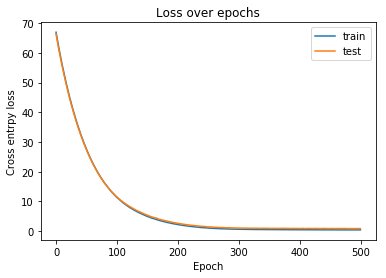

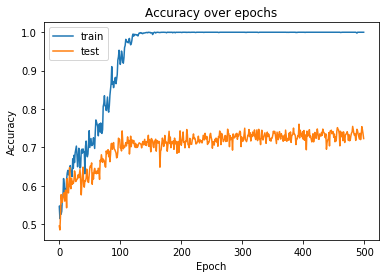

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over epochs')
plt.ylabel('Cross entrpy loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

[Save your model](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) to disk as a HDF5 file (the architecture, weights and optimizer state). This is simply so you can use it again easily in the later parts of the notebook, without having to keep it in memory or re-training it. The actual `.h5` files you create are not relevant to your submission.

In [44]:
model3.save('my_model.h5')

---
## 5. Transfer Learning

Now, instead of trying to come up with a good architecture for this task, we'll use the VGG16 architecture, but with the top layers removed (the fully connected + classification layers). We'll substitute them with a single fully connected layer, and a classification layer that makes sense for our problem.

However, this model has a very high capacity, and will probably suffer a lot from overfitting if we try to train it from scratch, using only our small subset of data. Instead, we'll start the optimization with the weights obtained after training VGG16 on the ImageNet dataset.

Start by loading the VGG16 model without the top layers, from the `applications` submodule from Keras. Make sure to also load the weights obtained from the ImageNet pretraining.

In [68]:
imagenet= keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

Create a new model with the layers you want to add on top of VGG. The kernels and bias in these layers should be initialized randomly.

In [69]:
for layer in imagenet.layers:
        layer.trainable = False
        
regularization = 0.1;
        
x = imagenet.output
x = Flatten()(x)
x = Dense(100, activation='relu', kernel_regularizer=regularizers.l2(regularization))(x)
predictions = Dense(2, activation='softmax')(x)



Now add the new model on top of VGG.

Tip:
- The VGG model you loaded from the `applications` submodule is from the [`Model`](https://keras.io/models/model/) class, not the `Sequential` class, so it doesn't have some methods you're used to (like `add`, for instance). It might be helpful to read [this introduction to the Model class](https://keras.io/getting-started/functional-api-guide/).

In [70]:
transfer_model = Model(inputs=imagenet.input, outputs=predictions)

### 5.1 Using VGG features

Now we're almost ready to train the new model. However, since the top layers of this architecture are being initialized randomly, it's sometimes possible for them to generate large gradients that can wreck the pretraining of the bottom layers. To avoid this, freeze all the VGG layers in your architecture (i.e. signal to the optimizer that these should not be changed during optimization) by setting the `trainable` attribute of them to `False`.

In [ ]:
# YOUR CODE HERE

Create the callbacks (if any) you would like to use, compile the model and train it.

In [71]:
np.random.seed(0)

opt4 = keras.optimizers.Adam(lr=1e-5, decay=1e-4)

transfer_model.compile(optimizer=opt4,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

steps_per_epoch = np.ceil(len(train_generator.filenames) / train_generator.batch_size);

history = transfer_model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    shuffle=True,
    use_multiprocessing=True,
    workers=12,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch)

Epoch 1/10
55/55 [==============================] - 59s 1s/step - loss: 5.0231 - acc: 0.7418 - val_loss: 4.1196 - val_acc: 0.7605
Epoch 2/10
55/55 [==============================] - 54s 984ms/step - loss: 2.9486 - acc: 0.9179 - val_loss: 3.3111 - val_acc: 0.8568
Epoch 3/10
55/55 [==============================] - 54s 986ms/step - loss: 2.4791 - acc: 0.9472 - val_loss: 3.2160 - val_acc: 0.8332
Epoch 4/10
55/55 [==============================] - 54s 977ms/step - loss: 2.4050 - acc: 0.9543 - val_loss: 3.0842 - val_acc: 0.8455
Epoch 5/10
19/55 [=========>....................] - ETA: 17s - loss: 2.3375 - acc: 0.9572

Process ForkPoolWorker-712:
Process ForkPoolWorker-727:
Process ForkPoolWorker-715:
Process ForkPoolWorker-709:
Process ForkPoolWorker-725:
Process ForkPoolWorker-720:
Process ForkPoolWorker-721:
Process ForkPoolWorker-731:
Process ForkPoolWorker-728:
Process ForkPoolWorker-724:
Process ForkPoolWorker-732:
Process ForkPoolWorker-713:
Process ForkPoolWorker-726:
Process ForkPoolWorker-729:
Process ForkPoolWorker-711:
Process ForkPoolWorker-718:
Process ForkPoolWorker-716:
Process ForkPoolWorker-722:
Process ForkPoolWorker-723:
Process ForkPoolWorker-714:
Process ForkPoolWorker-719:
Process ForkPoolWorker-730:
Process ForkPoolWorker-710:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/patrik/anaconda3/envs/dml/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent c

  File "/home/patrik/anaconda3/envs/dml/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/patrik/anaconda3/envs/dml/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/patrik/anaconda3/envs/dml/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/patrik/anaconda3/envs/dml/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/patrik/anaconda3/envs/dml/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/patrik/anaconda3/envs/dml/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/patrik/anaconda3/envs/dml/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/patrik/anaconda3/envs/dml/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/patrik/ana

KeyboardInterrupt
KeyboardInterrupt
  File "/home/patrik/anaconda3/envs/dml/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
  File "/home/patrik/anaconda3/envs/dml/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/patrik/anaconda3/envs/dml/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/patrik/anaconda3/envs/dml/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/patrik/anaconda3/envs/dml/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/patrik/anaconda3/envs/dml/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/home/patrik/anaconda3/env

KeyboardInterrupt: 

  File "/home/patrik/anaconda3/envs/dml/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt


Create one figure with two axes. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

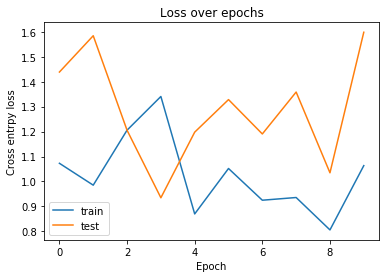

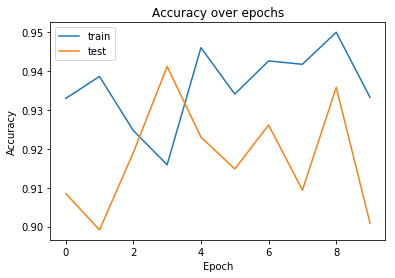

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over epochs')
plt.ylabel('Cross entrpy loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

How does the model perform, compared to the model obtained in step 4? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# YOUR CODE HERE

Compare these results. Which approach worked best, starting from scratch or doing transfer learning? Explain how you evaluated this.

**Your answer:** (fill in here)

What are the main differences between the ImageNet dataset and the Dogs vs Cats dataset we used?

**Your answer:** (fill in here)

Even though there are considerable differences between these datasets, why is it that transfer learning is still a good idea?

**Your answer:** (fill in here)

In which scenario would transfer learning be unsuitable?

**Your answer:** (fill in here)

Save the model to a HDF5 file.

In [ ]:
model.save('trans_learning_top_only.h5')

### 5.2 Fine-tuning

Now that we have a better starting point for the top layers, we can train the entire network. Unfreeze the bottom layers.

Tip:
- Always recompile your model after changing anything in it!

In [ ]:
model = load_model('trans_learning_top_only.h5')

# YOUR CODE HERE

Create the callbacks (if any) you would like to use for this training here, compile the model, and train it.

Tip:
- Even though we do have a decent starting point for the optimization, it's still possible that a bad hyper-parameter choice wrecks the preinitialization. Make sure to use a small learning rate for this step.

In [ ]:
# YOUR CODE HERE

How does the model perform, compared to the model trained with freezed layers? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# YOUR CODE HERE

Did the model's performance improve? Why (why not)?

**Your answer:** (fill in here)

Save the model to a HDF5 file.

In [ ]:
model.save('trans_learning_full.h5')

### 5.3 Improving the top model (optional)

Improve the architecture for the layers you add on top of VGG16. Try different ideas, and consider comparing them using tensorboard. When you're happy with one architecture, copy it in the cell below and train it here.

In [ ]:
# YOUR CODE HERE

How does the model perform, compared to the model trained in step 5.2? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# YOUR CODE HERE

Save the model to a HDF5 file.

In [ ]:
model.save('best_trans_learning.h5')

## 6. Final training

Now we'll train the model that achieved the best performance so far using the entire dataset.

**Note**: start the optimization with the weights you obtained training in the smaller subset, i.e. *not* from scratch.

First, create two new data generators, one for training samples and one for validation samples. This time, they'll load data from the folders for the entire dataset.

In [ ]:
model = load_model('trans_learning_full.h5')

# YOUR CODE HERE

Create the callbacks you would like to use and train your model. This optimization might take a long time, so TensorBoard is advised.

In [ ]:
# YOUR CODE HERE

How does the model perform now when trained on the entire dataset, compared to when only trained on the smaller subset of data? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# YOUR CODE HERE

What can you conclude from these plots?

**Your answer:** (fill in here)

## 7. Evaluation on test set

Now we'll evaluate your final model, obtained in step 6, on the test set. As mentioned before, the samples in the test set are not labeled, so we can't compute any performance metrics ourselves. Instead, we'll create a .csv file containing the predictions for each sample, and submit it to Kaggle for evaluation.

Compute the predictions for all samples in the test set according to your best model, and save it in a .csv file with the format expected by the competition.

Tip:
- There is a sample_submission file available for download in the same place where you downloaded the data from. Take a look at it to better understand what is the expected format here.

Hints:
- The Python module `os` has a `listdir` function, which returns the filenames of all files in a given path.
- If you don't know how to create and write to files with Python, Google can help.
- Keras has a submodule called `preprocessing.image`, with some handy functions (for instance `load_img` and `img_to_array`)

In [ ]:
# YOUR CODE HERE

Now that you created your submission file, submit it to Kaggle for evaluation. The [old competition](https://www.kaggle.com/c/dogs-vs-cats) does not allow submissions any more, so submit your file to the [new one](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition). Kaggle evaluates your submission according to your log-loss score. Which score did you obtain?

**Your answer:** (fill in here)

What was the username you used for this submission?

**Your answer:** (fill in here)